In [52]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [53]:
data=pd.read_csv('data.csv')
data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [54]:
data.shape

(14204, 12)

In [55]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14204 entries, 0 to 14203
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            14204 non-null  object 
 1   Item_Weight                11765 non-null  float64
 2   Item_Fat_Content           14204 non-null  object 
 3   Item_Visibility            14204 non-null  float64
 4   Item_Type                  14204 non-null  object 
 5   Item_MRP                   14204 non-null  float64
 6   Outlet_Identifier          14204 non-null  object 
 7   Outlet_Establishment_Year  14204 non-null  int64  
 8   Outlet_Size                10188 non-null  object 
 9   Outlet_Location_Type       14204 non-null  object 
 10  Outlet_Type                14204 non-null  object 
 11  Item_Outlet_Sales          14204 non-null  float64
dtypes: float64(4), int64(1), object(7)
memory usage: 1.3+ MB


In [56]:
for col in data.dtypes.index:
    if data[col].dtype=='object':
        print('Total unique values in the columns {} is '.format(col),data[col].nunique())

Total unique values in the columns Item_Identifier is  1559
Total unique values in the columns Item_Fat_Content is  5
Total unique values in the columns Item_Type is  16
Total unique values in the columns Outlet_Identifier is  10
Total unique values in the columns Outlet_Size is  3
Total unique values in the columns Outlet_Location_Type is  3
Total unique values in the columns Outlet_Type is  4


In [57]:
null_val=data.isna().sum()
print(null_val)
for col in null_val[null_val >0].index:
    print(f'\n {col} {null_val[col]} null values')
    print('data type of {} is {}'.format(col,data[col].dtype))

Item_Identifier                 0
Item_Weight                  2439
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  4016
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

 Item_Weight 2439 null values
data type of Item_Weight is float64

 Outlet_Size 4016 null values
data type of Outlet_Size is object


In [58]:
duplicates=data[data.duplicated()]
print("Duplicate values in the data set is ",duplicates.shape[0])

Duplicate values in the data set is  0


In [59]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Item_Weight,11765.0,12.792854,4.652502,4.555,8.710000,12.600000,16.750000,21.350000
Item_Visibility,14204.0,0.065953,0.051459,0.000,0.027036,0.054021,0.094037,0.328391
Item_MRP,14204.0,141.004977,62.086938,31.290,94.012000,142.247000,185.855600,266.888400
Outlet_Establishment_Year,14204.0,1997.830681,8.371664,1985.000,1987.000000,1999.000000,2004.000000,2009.000000
Item_Outlet_Sales,14204.0,2099.333529,1542.432736,33.290,878.856000,1828.273366,2949.298043,13086.964800


In [60]:
data.describe().style.background_gradient(cmap='magma_r')

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,11765.000000,14204.000000,14204.000000,14204.000000,14204.000000
mean,12.792854,0.065953,141.004977,1997.830681,2099.333529
std,4.652502,0.051459,62.086938,8.371664,1542.432736
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.710000,0.027036,94.012000,1987.000000,878.856000
50%,12.600000,0.054021,142.247000,1999.000000,1828.273366
75%,16.750000,0.094037,185.855600,2004.000000,2949.298043
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


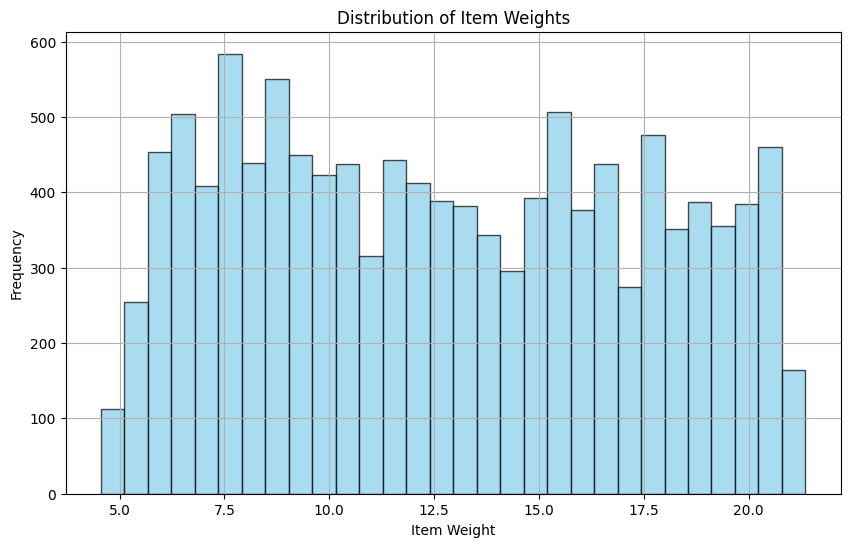

In [61]:
item_weights = data['Item_Weight']
plt.figure(figsize=(10, 6))
plt.hist(item_weights, bins=30, color='skyblue', edgecolor='black', alpha=0.7)
plt.title('Distribution of Item Weights')
plt.xlabel('Item Weight')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()


In [62]:
data['Item_Weight'].fillna(data['Item_Weight'].mean(),inplace=True)

In [63]:
data['Outlet_Size'].fillna(data['Outlet_Size'].mode()[0],inplace=True)

c:\Users\conbo\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


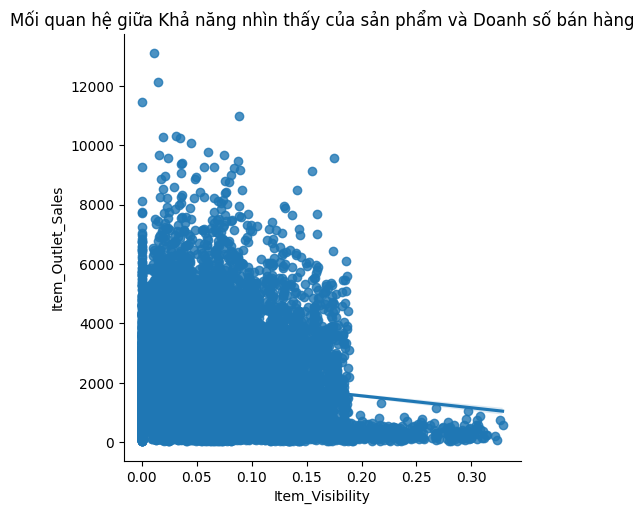

In [64]:
sns.lmplot(x = 'Item_Visibility', y='Item_Outlet_Sales',data = data)
plt.title('Mối quan hệ giữa Khả năng nhìn thấy của sản phẩm và Doanh số bán hàng')
plt.show()

c:\Users\conbo\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


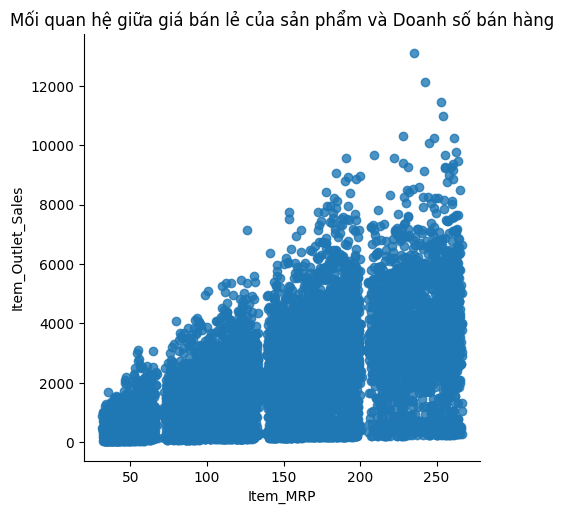

In [65]:
sns.lmplot(x = 'Item_MRP', y = 'Item_Outlet_Sales', data = data)
plt.title('Mối quan hệ giữa giá bán lẻ của sản phẩm và Doanh số bán hàng')
plt.show()


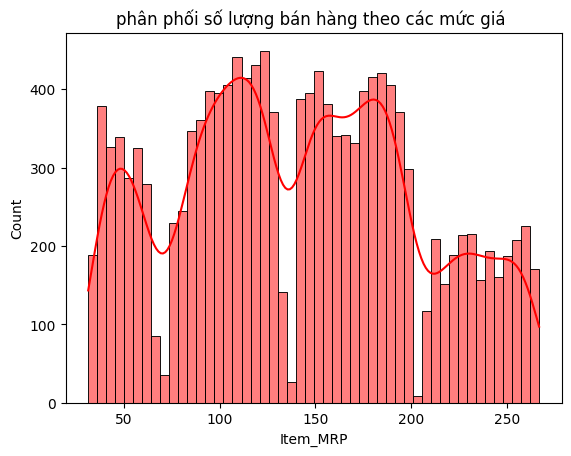

In [66]:
sns.histplot(data=data,x='Item_MRP', bins=50, pthresh=.1, color='red',stat='count',kde=True)
plt.title('phân phối số lượng bán hàng theo các mức giá ')
plt.show()

In [67]:
data.replace(to_replace=["LF", "low fat",'reg'],
           value=['Low Fat','Low Fat','Regular'],inplace=True)

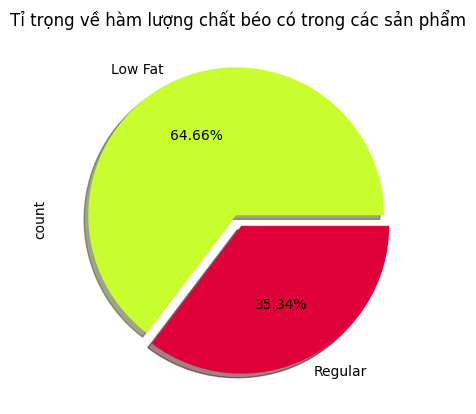

In [68]:
data['Item_Fat_Content'].value_counts().sort_values(ascending=False)\
.plot(kind='pie',explode=[0.03,0.05],
    labels=['Low Fat', 'Regular'],
    colors=['#C8FE2E','#DF013A'],
    autopct='%1.2f%%',
    shadow=True)
plt.title("Tỉ trọng về hàm lượng chất béo có trong các sản phẩm")
plt.show()

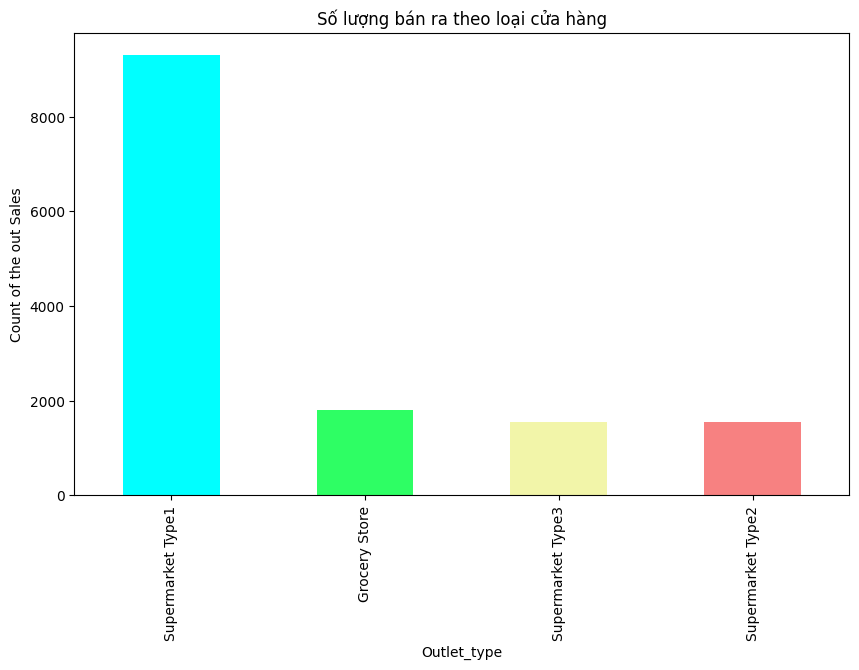

In [69]:
data['Outlet_Type'].value_counts().sort_values(ascending=False)\
.plot(kind='bar',color=['#00FFFF','#2EFE64','#F2F5A9','#F78181'],figsize=(10,6))
plt.xlabel('Outlet_type')
plt.ylabel('Count of the out Sales')
plt.title('Số lượng bán ra theo loại cửa hàng')
plt.show()


C:\Users\conbo\AppData\Local\Temp\ipykernel_15572\2915846104.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Outlet_Type', y='Item_Outlet_Sales', data=total_sales_by_type, palette='viridis')


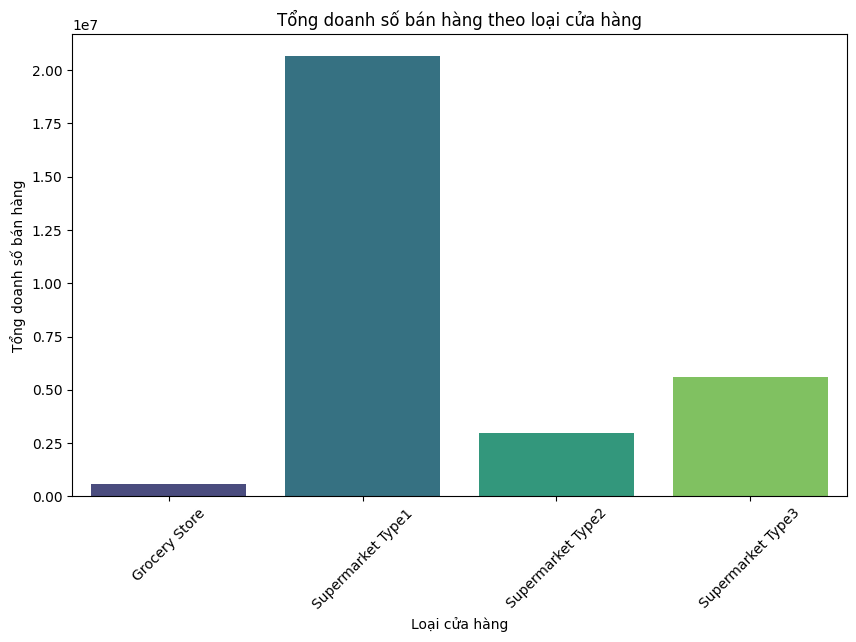

In [70]:
import seaborn as sns
import matplotlib.pyplot as plt

# Tính tổng doanh số bán hàng cho mỗi loại cửa hàng
total_sales_by_type = data.groupby('Outlet_Type')['Item_Outlet_Sales'].sum().reset_index()

# Vẽ biểu đồ cột
plt.figure(figsize=(10, 6))
sns.barplot(x='Outlet_Type', y='Item_Outlet_Sales', data=total_sales_by_type, palette='viridis')
plt.title('Tổng doanh số bán hàng theo loại cửa hàng')
plt.xlabel('Loại cửa hàng')
plt.ylabel('Tổng doanh số bán hàng')
plt.xticks(rotation=45)
plt.show()


Outlet_Type with highest sales: Supermarket Type1


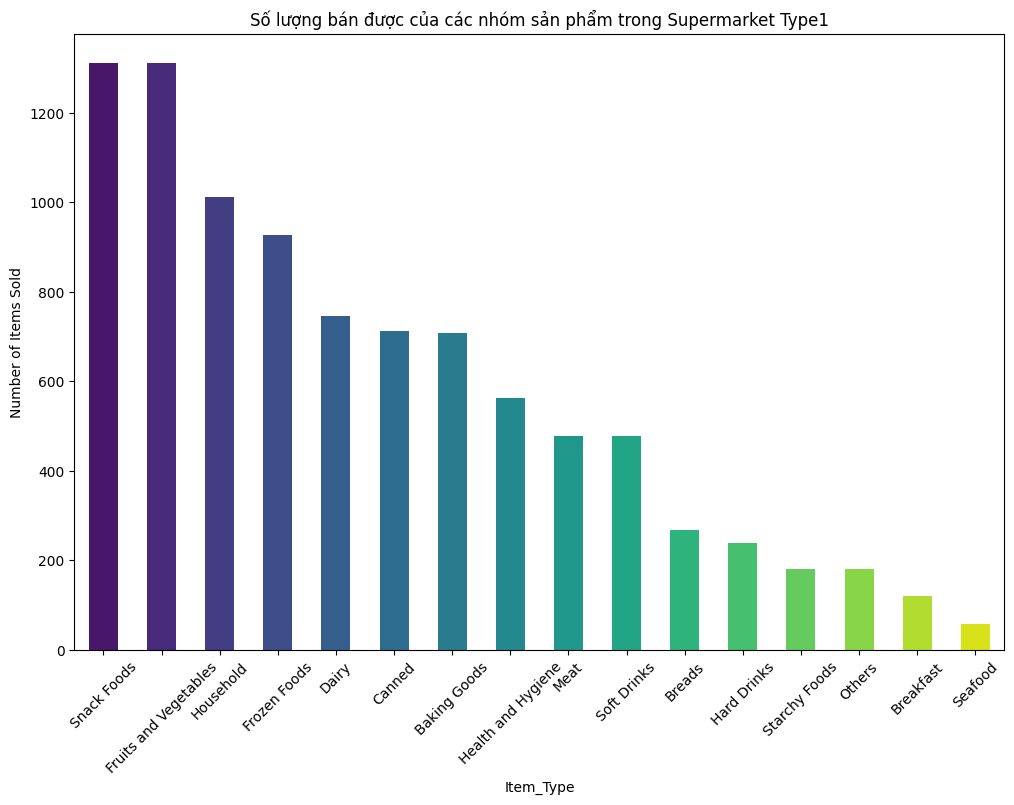

In [71]:
outlet_sales = data.groupby('Outlet_Type')['Item_Outlet_Sales'].sum()
top_outlet_type = outlet_sales.idxmax()
print(f'Outlet_Type with highest sales: {top_outlet_type}')
top_outlet_data = data[data['Outlet_Type'] == top_outlet_type]
item_counts = top_outlet_data['Item_Type'].value_counts()
plt.figure(figsize=(12, 8))
item_counts.plot(kind='bar', color=sns.color_palette('viridis', len(item_counts)))
plt.xlabel('Item_Type')
plt.ylabel('Number of Items Sold')
plt.title(f'Số lượng bán được của các nhóm sản phẩm trong {top_outlet_type}')
plt.xticks(rotation=45)
plt.show()


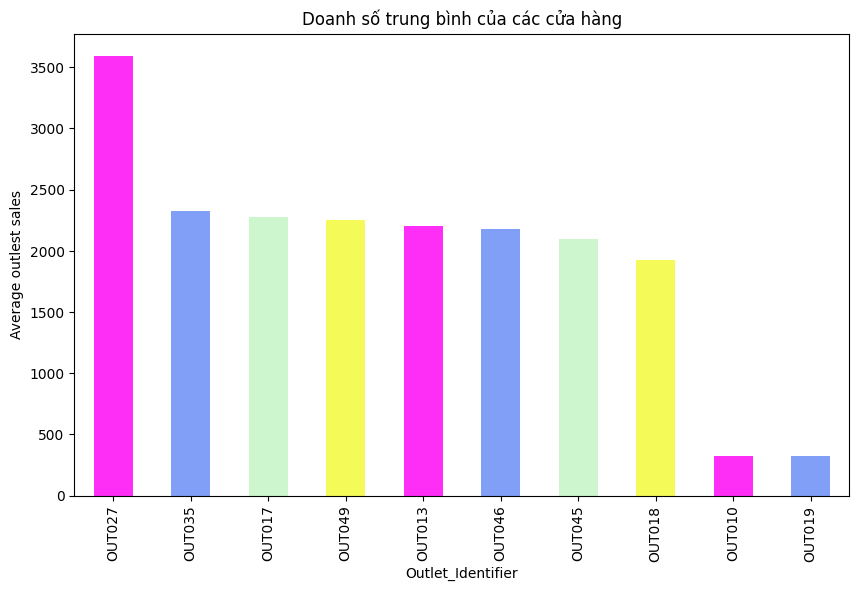

In [72]:
data.groupby('Outlet_Identifier')['Item_Outlet_Sales'].mean().sort_values(ascending=False)\
.plot(kind='bar',figsize=(10,6),title="Doanh số trung bình của các cửa hàng",color=['#FE2EF7','#819FF7','#CEF6CE','#F4FA58'])
plt.xlabel("Outlet_Identifier")
plt.ylabel("Average outlest sales")
plt.show()

In [73]:
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

In [74]:
categorical=[col for col in data.columns if data[col].dtype=='object']
categorical

['Item_Identifier',
 'Item_Fat_Content',
 'Item_Type',
 'Outlet_Identifier',
 'Outlet_Size',
 'Outlet_Location_Type',
 'Outlet_Type']

In [75]:
for col in data.select_dtypes(include='object').columns:
    labelencoder=LabelEncoder()
    labelencoder.fit(data[col].unique())
    data[col]=labelencoder.transform(data[col])
    print(f'{col}: {data[col].unique()}') 

Item_Identifier: [ 156    8  662 ... 1323 1524 1519]
Item_Fat_Content: [0 1]
Item_Type: [ 4 14 10  6  9  0 13  5  2  8  7  3  1 15 11 12]
Outlet_Identifier: [9 3 0 1 5 7 2 8 6 4]
Outlet_Size: [1 0 2]
Outlet_Location_Type: [0 2 1]
Outlet_Type: [1 2 0 3]


In [76]:
data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,156,9.30,0,0.016047,4,249.8092,9,1999,1,0,1,3735.1380
1,8,5.92,1,0.019278,14,48.2692,3,2009,1,2,2,443.4228
2,662,17.50,0,0.016760,10,141.6180,9,1999,1,0,1,2097.2700
3,1121,19.20,1,0.000000,6,182.0950,0,1998,1,2,0,732.3800
4,1297,8.93,0,0.000000,9,53.8614,1,1987,0,2,1,994.7052


In [77]:
non_numeric_columns = data.select_dtypes(exclude=['number']).columns

data_numeric = data.drop(columns=non_numeric_columns)

data_numeric['Item_Outlet_Sales'] = data['Item_Outlet_Sales']

corr = data_numeric.corr()

corr_sorted = corr['Item_Outlet_Sales'].sort_values(ascending=False)

print(corr_sorted)

Item_Outlet_Sales            1.000000
Item_MRP                     0.602297
Outlet_Type                  0.435849
Outlet_Identifier            0.168893
Outlet_Location_Type         0.100386
Item_Type                    0.026847
Item_Weight                  0.021600
Item_Fat_Content             0.011056
Item_Identifier              0.007370
Outlet_Establishment_Year   -0.054176
Outlet_Size                 -0.095227
Item_Visibility             -0.134118
Name: Item_Outlet_Sales, dtype: float64


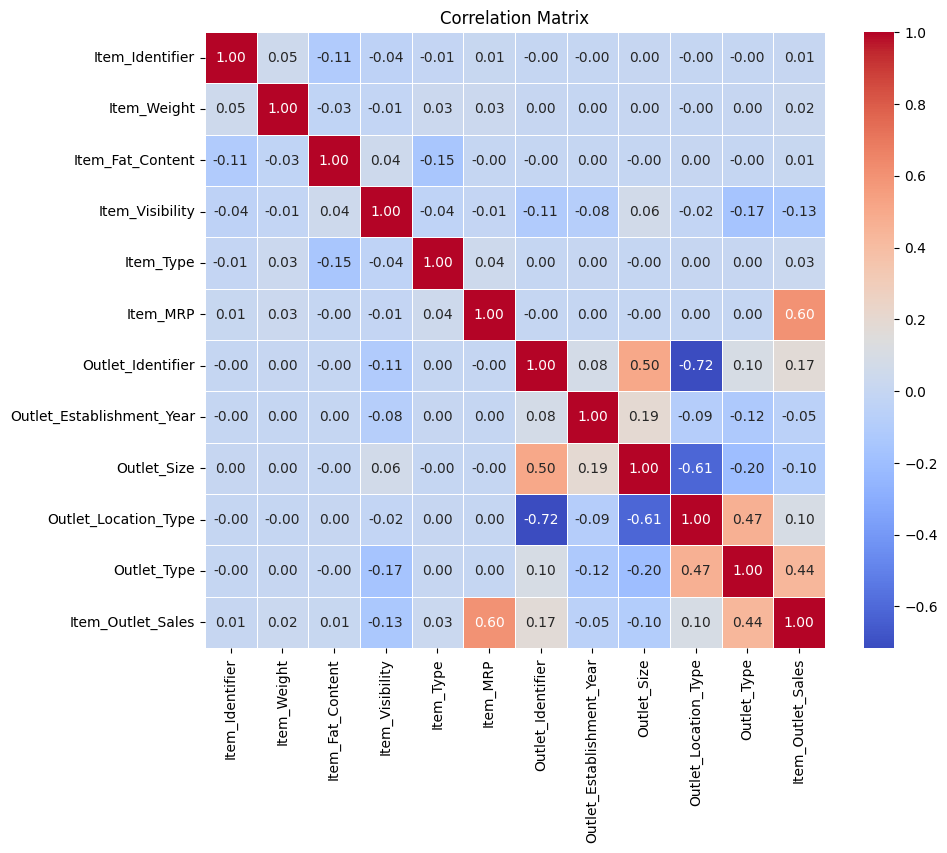

In [78]:
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

In [80]:
X=data[['Item_Weight','Item_Visibility','Item_Type','Item_MRP','Outlet_Identifier','Outlet_Establishment_Year','Outlet_Location_Type','Outlet_Type']]
y=data['Item_Outlet_Sales']
scaler=StandardScaler()
X=scaler.fit_transform(X)
X
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=250)

In [81]:
models=[]
models.append(('LR',LinearRegression()))
models.append(('Tree',DecisionTreeRegressor()))
models.append(('Random',RandomForestRegressor()))

In [82]:
result=[]
model_names=[]
for name,model in models:
    cv_result=cross_val_score(model,X_train,y_train,cv=5,scoring='r2')
    result.append(cv_result)
    model_names.append(name)
    print(f"{name}: mean {cv_result.mean()} std {cv_result.std()}")

LR: mean 0.5740067296751322 std 0.008841610623611234
Tree: mean 0.3674720593903137 std 0.021360633196015232
Random: mean 0.6681238965796764 std 0.012884325625765235


In [83]:
def model_buliding(model,X_train,X_test,y_train,y_test):
    model.fit(X_train,y_train)
    y_pred=model.predict(X_test)
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    rmse = np.sqrt(mse)


    print('MAE is {}'.format(mae))
    print('MSE is {}'.format(mse))
    print('R2 score is {}'.format(r2))
    print('RMSE score is {}'.format(rmse))

In [84]:
linear=LinearRegression()
model_buliding(linear,X_train,X_test,y_train,y_test)

MAE is 710.6755804595028
MSE is 988705.9852145934
R2 score is 0.5609049455896351
RMSE score is 994.3369575825859


In [85]:
tree=DecisionTreeRegressor()
model_buliding(tree,X_train,X_test,y_train,y_test)

MAE is 799.2725402128808
MSE is 1492333.082184097
R2 score is 0.33723868802332646
RMSE score is 1221.610855462613


In [86]:
random=RandomForestRegressor()
model_buliding(random,X_train,X_test,y_train,y_test)

MAE is 554.2393902611208
MSE is 753909.0778994808
R2 score is 0.6651807994174421
RMSE score is 868.279377792356


In [87]:
from sklearn.neighbors import KNeighborsRegressor
knn=KNeighborsRegressor()
model_buliding(knn,X_train,X_test,y_train,y_test)

MAE is 606.3628243046081
MSE is 844731.8720760649
R2 score is 0.6248454111958235
RMSE score is 919.092961607293


In [88]:
X=data.drop('Item_Outlet_Sales',axis=1)
y=data['Item_Outlet_Sales']
scaler=StandardScaler()
X=scaler.fit_transform(X)
X
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=250)


In [89]:
models=[]
models.append(('LR',LinearRegression()))
models.append(('Tree',DecisionTreeRegressor()))
models.append(('Random',RandomForestRegressor()))


In [90]:
result=[]
model_names=[]
for name,model in models:
    cv_result=cross_val_score(model,X_train,y_train,cv=5,scoring='r2')
    result.append(cv_result)
    model_names.append(name)
    print(f"{name}: mean {cv_result.mean()} std {cv_result.std()}")

LR: mean 0.5818694638364947 std 0.006375655584422804
Tree: mean 0.37279410108066974 std 0.0300372089287443
Random: mean 0.6698011481973468 std 0.014993838990203767


In [91]:
def model_buliding(model,X_train,X_test,y_train,y_test):
    #fit the train data to the model
    model.fit(X_train,y_train)
    # predict the test data for the model
    y_pred=model.predict(X_test)
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2_sqr=r2_score(y_test, y_pred)


    print('MAE is {}'.format(mae))
    print('MSE is {}'.format(mse))
    print('R2 score is {}'.format(r2))
    print('RMSE score is {}'.format(rmse))

In [92]:
linear=LinearRegression()
model_buliding(linear,X_train,X_test,y_train,y_test)

MAE is 708.2759654556452
MSE is 963826.5712628012
R2 score is 0.5719541632400058
RMSE score is 981.7466940422062


In [93]:
tree=DecisionTreeRegressor()
model_buliding(tree,X_train,X_test,y_train,y_test)

MAE is 781.926225519993
MSE is 1402025.7786178987
R2 score is 0.3773451412723645
RMSE score is 1184.0716948808035


In [94]:
random=RandomForestRegressor()
model_buliding(random,X_train,X_test,y_train,y_test)

MAE is 548.3465075235817
MSE is 745799.844841159
R2 score is 0.6687821977949358
RMSE score is 863.5970384624758


In [95]:
data.columns.to_list()

['Item_Identifier',
 'Item_Weight',
 'Item_Fat_Content',
 'Item_Visibility',
 'Item_Type',
 'Item_MRP',
 'Outlet_Identifier',
 'Outlet_Establishment_Year',
 'Outlet_Size',
 'Outlet_Location_Type',
 'Outlet_Type',
 'Item_Outlet_Sales']

# Hyperparmeter Turning with GridSearchCv

In [96]:
from sklearn.model_selection import GridSearchCV


In [97]:
lr = LinearRegression()

param_grid = {
    'fit_intercept': [True,False],
    'copy_X': [True,False],
}

grid_search = GridSearchCV(lr, param_grid, cv=5, scoring='r2')

grid_search.fit(X_train, y_train)

print("Best hyperparameters: ", grid_search.best_params_)

Best hyperparameters:  {'copy_X': True, 'fit_intercept': True}


In [104]:
lr_1=LinearRegression(**{'copy_X': True, 'fit_intercept': True})
model_buliding(lr_1,X_train,X_test,y_train,y_test)

MAE is 708.2759654556452
MSE is 963826.5712628012
R2 score is 0.5719541632400058
RMSE score is 981.7466940422062


In [99]:
tree = DecisionTreeRegressor()

param_grid = {
    'max_depth': [None, 10, 20, 30, 40, 50],
    'min_samples_split': [2, 5, 10, 20],
    'min_samples_leaf': [1, 2, 5, 10],
    'max_features': [None, 'auto', 'sqrt', 'log2']
}

grid_search = GridSearchCV(tree, param_grid, cv=5, scoring='r2')

grid_search.fit(X_train, y_train)

print("Best hyperparameters: ", grid_search.best_params_)

Best hyperparameters:  {'max_depth': 10, 'max_features': None, 'min_samples_leaf': 10, 'min_samples_split': 2}


c:\Users\conbo\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_validation.py:547: FitFailedWarning: 
480 fits failed out of a total of 1920.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
480 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\conbo\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_validation.py", line 895, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\conbo\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py", line 1467, in wrapper
    estimator._validate_params()
  File "c:\Users\conbo\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\bas

In [105]:
tree_1=DecisionTreeRegressor(**{'criterion': 'friedman_mse', 'max_depth': 10, 'max_features': 'log2', 'min_samples_split': 100, 'splitter': 'best'})
model_buliding(tree_1,X_train,X_test,y_train,y_test)

MAE is 671.9802878528153
MSE is 960065.5658874062
R2 score is 0.5736244665300059
RMSE score is 979.8293554938055


In [101]:
rf = RandomForestRegressor()

param_grid = {
    'n_estimators': [50, 100],
    'max_depth': [None, 10, 20],
    'max_features': ['auto', 'sqrt'],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
    'bootstrap': [True, False]
}

grid_search = GridSearchCV(rf, param_grid, cv=5, scoring='r2')

grid_search.fit(X_train, y_train)

print("Best hyperparameters: ", grid_search.best_params_)

c:\Users\conbo\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_validation.py:547: FitFailedWarning: 
240 fits failed out of a total of 480.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
240 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\conbo\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_validation.py", line 895, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\conbo\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py", line 1467, in wrapper
    estimator._validate_params()
  File "c:\Users\conbo\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base

Best hyperparameters:  {'bootstrap': True, 'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 100}


In [106]:
random=RandomForestRegressor(**{'bootstrap': True, 'max_depth': 20, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 100})
model_buliding(random,X_train,X_test,y_train,y_test)

MAE is 526.0215303007512
MSE is 696840.8892982709
R2 score is 0.6905254011025532
RMSE score is 834.7699619046381
